[130.29, 130.25, 130.22, 130.25, 130.2, 132.015, 132.74, 132.945, 132.459, 131.395, 130.67, 130.19, 130.1, 130.04, 130.04, 129.85]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


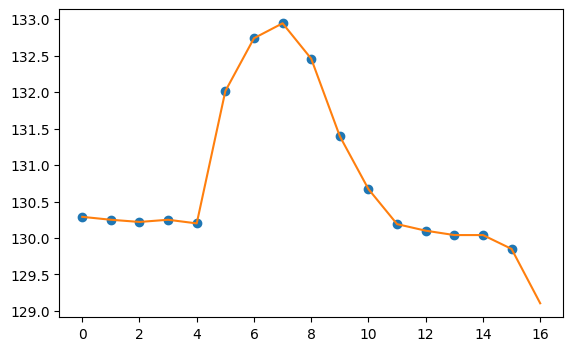

In [23]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
import requests as req


url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/hour/2023-01-09/2023-01-09?adjusted=true&sort=asc&limit=5000&apiKey=sJOkwomtyMM62O3L_7mLWEA2Mhu7eW2p"
response = req.get(url)
response_json = response.json()
close_prices = [ent['c'] for ent in response_json['results']]

step = 1 
time = list(range(0, len(close_prices)))

sc = sci.interpolate.CubicSpline(time, close_prices, extrapolate=True)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(time, sc(time), 'o')
time.append(time[-1] + step)
ax.plot(time, sc(time))
